# Sample code to test features of 'NumPy', 'Matplotlib' and 'Scipy'
---
Importing includes

In [2]:
%matplotlib inline

from __future__ import print_function
import matplotlib.pyplot as plt
import theano
import numpy as np
from theano import tensor as T
from numpy.linalg import inv

Testing variable assignment and operations in python

In [3]:
x = 2
print(x)
y = x**2
print(y)

2
4


Extra: Testing **Theano** capabalities in handling symbolic variables

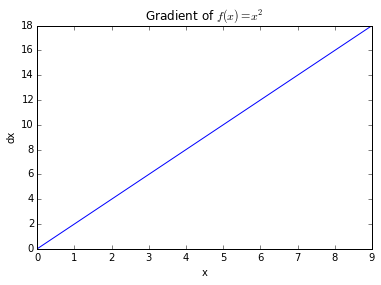

In [4]:
# Theano symbolic gradient example
B = T.scalar('E')
R = T.sqr(B)
A = T.grad(R,B)
Z = theano.function([B], A)

# Theano symbolic gradient example - Numeric
a = range(10)
da= range(10)
for idx,x in enumerate(a): 
    da[idx] = Z(x)
plt.plot(a,da)
plt.xlabel('x')
plt.ylabel('dx')
plt.title('Gradient of $f(x)=x^2$')
plt.show()

# Simple Linear Regression
Let $y = 3x + 2 + 10*n$ be the equation of a line, where $n \sim \eta(0,1)$ is standard normal distribution.

Let x = [1:100]. We will plot the scatter plot of y vs x

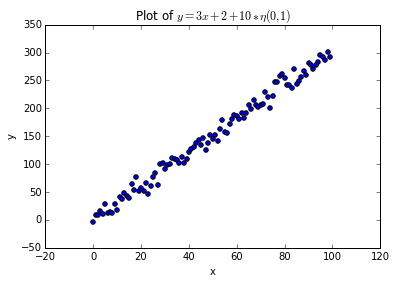

In [5]:
a = 3
b = 2
N = 100
# y = ax+b
x = np.reshape(range(N),(N,1))
y = a*x + b + 10*np.random.randn(N,1)

#plot
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y = 3x+2 + 10*\eta (0,1)$')
plt.show()

From linear regression using the model $$p(y_i/\mathbf{x_i}) = \eta(y_i/\mathbf{w}^T\mathbf{x_i},\sigma^2)$$
We have $$ \mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} $$
Now we will plot the original points and the line fitted using linear regression.

a =  [ 3.0183649] b =  [ 0.55528861]


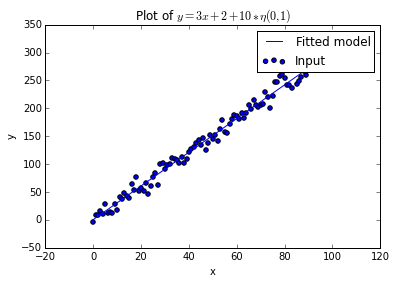

In [6]:
# Linear regression (MSE)
# Augment x with 1
X = np.hstack((np.ones((N,1)),x))
w = np.dot(inv(X.T.dot(X)),X.T.dot(y))
print('a = ',w[1],'b = ',w[0])
plt.scatter(x,y)
plt.plot(x,X.dot(w))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Fitted model','Input'])
plt.title('Plot of $y = 3x+2 + 10*\eta (0,1)$')
plt.show()